<a href="https://colab.research.google.com/github/silviutroscot/Machine-Learning-Playground/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic regression

## Python implementation of the second assignment from Andrew NG's [Machine Learning](https://www.coursera.org/learn/machine-learning) course.

### This notebook contains generic logistic regression functions, applied on two use cases:
- Binary classification, where we want to predict if a student is admitted, based on their result of two exams
- Binary clasification w

In [1]:
# Load the Drive helper and mount
# This should be runned only once, at the initialization of the notebook
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.seterr(over='raise')

# read dataset from Google drive
with open("drive/My Drive/Datasets/exams_results_admission_classification.txt", 'r') as dataset:
  data = pd.read_csv(dataset, header=None)
  data.columns = (["first_exam_result", "second_exam_result", "admited"])

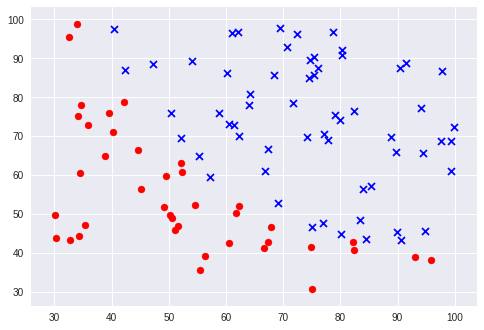

In [51]:
# plot data
def plotData(data):
  featuresMatrix = data.iloc[:,0:len(data.columns)-1]
  labelsVector = data.iloc[:,len(data.columns)-1].tolist()
  fig, ax = plt.subplots()
  for index in range(0, len(labelsVector)):
    if labelsVector[index] is 1:
        ax.scatter(featuresMatrix.iloc[index,0:1], featuresMatrix.iloc[index,1:2], marker='x', color='blue') 
    else:
        ax.scatter(featuresMatrix.iloc[index,0:1], featuresMatrix.iloc[index,1:2], marker='o', color='red')

plotData(data)

In [86]:
# scale the features to be in range [-1, 1], by dividing each column by its absolute max
def scaleFeatures(data):
  cData = data.copy()
  maxValues = []
  featuresMatrix = data.iloc[:,0:len(data.columns)-1]
  for columnIndex in range(0, len(featuresMatrix.columns)):
    maxValue = featuresMatrix.iloc[:,columnIndex].abs().nlargest(1)
    print (float(maxValue))
    featuresMatrix.iloc[:,columnIndex] = featuresMatrix.iloc[:,columnIndex] / float(maxValue)
    maxValues.append(float(maxValue))
  
  return (maxValues, featuresMatrix)
    
print (scaleFeatures(data))
print(data)

99.82785779692128
98.86943574220612
([99.82785779692128, 98.86943574220612],     first_exam_result  second_exam_result
0            0.346834            0.789169
1            0.303389            0.443969
2            0.359092            0.737358
3            0.602864            0.872955
4            0.791690            0.762059
5            0.451610            0.569603
6            0.612120            0.976150
7            0.751541            0.470864
8            0.762300            0.884202
9            0.845784            0.440312
10           0.960269            0.386624
11           0.751430            0.309532
12           0.824490            0.773565
13           0.694842            0.988361
14           0.396065            0.769063
15           0.540641            0.902274
16           0.691892            0.533436
17           0.680640            0.472123
18           0.707834            0.939898
19           0.771115            0.481200
20           0.674882            0.433283